In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit

In [2]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.shape

(6435, 8)

In [4]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
for i in range(45):
    print(df[df['Store']==i+1].describe(include='all'))

        Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   143.0         143  1.430000e+02    143.000000   143.000000   
unique    NaN         143           NaN           NaN          NaN   
top       NaN  05-02-2010           NaN           NaN          NaN   
freq      NaN           1           NaN           NaN          NaN   
mean      1.0         NaN  1.555264e+06      0.069930    68.306783   
std       0.0         NaN  1.559808e+05      0.255926    14.250486   
min       1.0         NaN  1.316899e+06      0.000000    35.400000   
25%       1.0         NaN  1.458105e+06      0.000000    58.265000   
50%       1.0         NaN  1.534850e+06      0.000000    69.640000   
75%       1.0         NaN  1.614892e+06      0.000000    80.485000   
max       1.0         NaN  2.387950e+06      1.000000    91.650000   

        Fuel_Price         CPI  Unemployment  
count   143.000000  143.000000    143.000000  
unique         NaN         NaN           NaN  
top            NaN

In [9]:
Sales=[]
for i in range(45):
    Sales.append(df[df['Store']==i+1].sum())
labels=[]
for i in range(45):
    labels.append('Store'+str(i+1))
print(Sales)
print(labels)

[Store                                                         143
Date            05-02-201012-02-201019-02-201026-02-201005-03-...
Weekly_Sales                                         222402808.85
Holiday_Flag                                                   10
Temperature                                               9767.87
Fuel_Price                                                460.417
CPI                                                  30887.555523
Unemployment                                              1088.29
dtype: object, Store                                                         286
Date            05-02-201012-02-201019-02-201026-02-201005-03-...
Weekly_Sales                                         275382440.98
Holiday_Flag                                                   10
Temperature                                               9754.94
Fuel_Price                                                460.417
CPI                                                   30837.

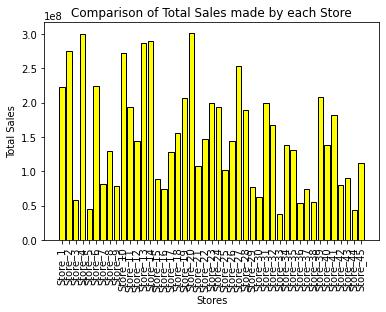

In [10]:
Sales=[]
for i in range(45):
    Sales.append(df[df['Store']==i+1]['Weekly_Sales'].sum())
labels=[]
for i in range(45):
    labels.append('Store_'+str(i+1))
plt.bar(x=labels,height=Sales,color='yellow',edgecolor='black')
plt.tick_params(axis='x',rotation=90)
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Comparison of Total Sales made by each Store')
plt.show()

In [11]:
max_total_sales=np.max(Sales)

In [12]:
print(df[df['Store']==20]['Weekly_Sales'].sum(),df[df['Store']==4]['Weekly_Sales'].sum())

301397792.46000004 299543953.38


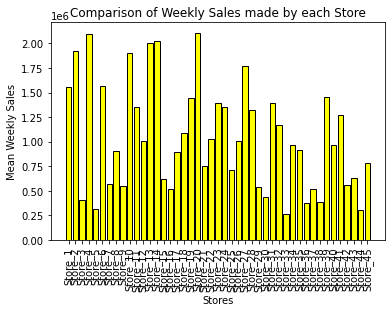

In [13]:
Sales=[]
for i in range(45):
    Sales.append(df[df['Store']==i+1]['Weekly_Sales'].mean())
labels=[]
for i in range(45):
    labels.append('Store_'+str(i+1))
plt.bar(x=labels,height=Sales,color='yellow',edgecolor='black')
plt.tick_params(axis='x',rotation=90)
plt.xlabel('Stores')
plt.ylabel('Mean Weekly Sales')
plt.title('Comparison of Weekly Sales made by each Store')
plt.show()

In [14]:
print(df[df['Store']==20]['Weekly_Sales'].mean(),df[df['Store']==4]['Weekly_Sales'].mean())


2107676.8703496507 2094712.9606993007


### Inference
Store 20 has gained maximum of total and mean Sales

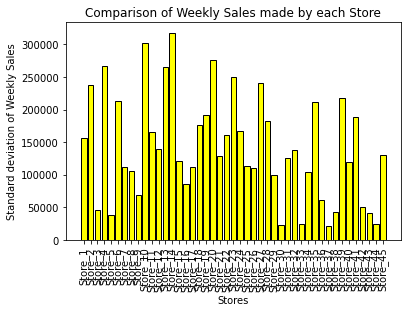

In [15]:
Sales=[]
for i in range(45):
    Sales.append(df[df['Store']==i+1]['Weekly_Sales'].std())
labels=[]
for i in range(45):
    labels.append('Store_'+str(i+1))
plt.bar(x=labels,height=Sales,color='yellow',edgecolor='black')
plt.tick_params(axis='x',rotation=90)
plt.xlabel('Stores')
plt.ylabel('Standard deviation of Weekly Sales')
plt.title('Comparison of Weekly Sales made by each Store')
plt.show()

Store 14 has maximum number of standard deviation

In [16]:
mean_to_std=[]
for i in range(45):
    mean_to_std.append(df[df['Store']==i+1]['Weekly_Sales'].mean()/df[df['Store']==i+1]['Weekly_Sales'].std())
print(mean_to_std)
print(len(mean_to_std))

[9.97087281897146, 8.102160049735797, 8.694033771710274, 7.868901620609602, 8.426840297659469, 7.3625309256954665, 5.068303331022042, 8.550455612831156, 7.880502105745194, 6.284032329161997, 8.179167370154227, 7.250300274822735, 7.546393647523122, 6.363884253900048, 5.1710589458200795, 6.053977690764885, 7.966815256389671, 6.140789986992968, 7.5369244093220855, 7.6392626727529285, 5.872252936474086, 6.378247592509637, 5.564175415442511, 8.088169026135288, 6.255457792809512, 9.081772580655267, 7.398888000735077, 7.281743837686042, 5.442399973067017, 19.22779685170998, 11.091263587058624, 8.452335757461864, 10.767930825716027, 9.239988892654177, 4.353862548909499, 6.150859203588167, 23.76193264602111, 9.019129372327182, 6.6707673616817145, 8.101772458805877, 6.748680572612476, 11.069866253955498, 15.599740785113255, 12.225938690200241, 6.038183183364264]
45


In [17]:
from datetime import datetime
for i in range(len(df['Date'])):
    df['Date'].loc[i]=datetime(year=int(df['Date'].loc[i][6:10]),month=int(df['Date'].loc[i][3:5]),day=int(df['Date'].loc[i][0:2]))

/tmp/ipykernel_105/102568077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].loc[i]=datetime(year=int(df['Date'].loc[i][6:10]),month=int(df['Date'].loc[i][3:5]),day=int(df['Date'].loc[i][0:2]))


In [18]:
df['Date']


0       2010-02-05 00:00:00
1       2010-02-12 00:00:00
2       2010-02-19 00:00:00
3       2010-02-26 00:00:00
4       2010-03-05 00:00:00
               ...         
6430    2012-09-28 00:00:00
6431    2012-10-05 00:00:00
6432    2012-10-12 00:00:00
6433    2012-10-19 00:00:00
6434    2012-10-26 00:00:00
Name: Date, Length: 6435, dtype: object

In [19]:
df['Date']=pd.to_datetime(df['Date'])

In [20]:
df.set_index('Date',inplace=True)


In [22]:
growth_rate=[]
for i in range(45):
    q3=df[df['Store']==i+1].loc[datetime(year=2012,month=1,day=6):datetime(year=2012,month=10,day=26)].resample('11W').sum()['Weekly_Sales'].loc[datetime(year=2012,month=6,day=10)]
    q1=df[df['Store']==i+1].loc[datetime(year=2012,month=1,day=6):datetime(year=2012,month=10,day=26)].resample('11W').sum()['Weekly_Sales'].loc[datetime(year=2012,month=1,day=8)]
    growth_rate.append((q3-q1)*100/q3)

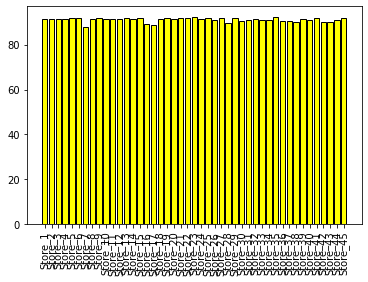

In [23]:
plt.Figure(figsize=(20,15),dpi=100)
plt.tick_params(axis='x',rotation=90)
plt.bar(x=labels,height=growth_rate,color='yellow',edgecolor='black')
plt.show()

In [24]:
np.max(growth_rate)

92.47867921312371

### Inference
Store 23 have made good quarterly growth rate

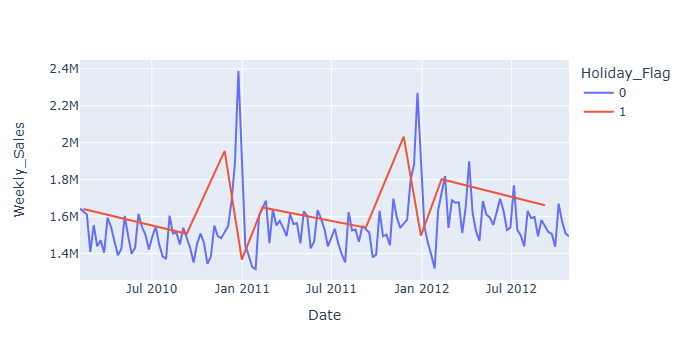

In [27]:
figure=px.line(df[df['Store']==1],y='Weekly_Sales',color='Holiday_Flag')
figure.show()

### Inferences 
1. 26 November 2010 have higher sales holidays than non-holidays.
2. 11 Feb 2011 have higher sales holidays than non-holidays.
3. 25 Nov 2011 have higher sales holidays than non-holidays.

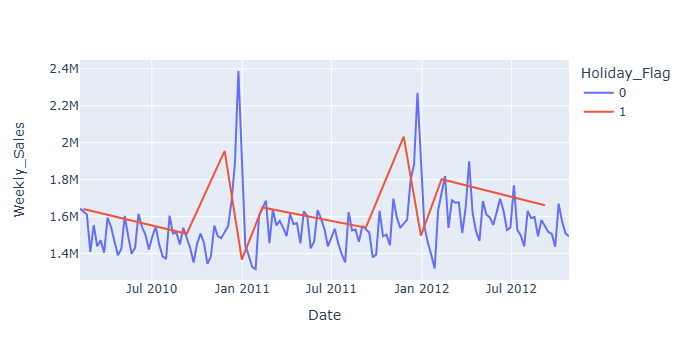

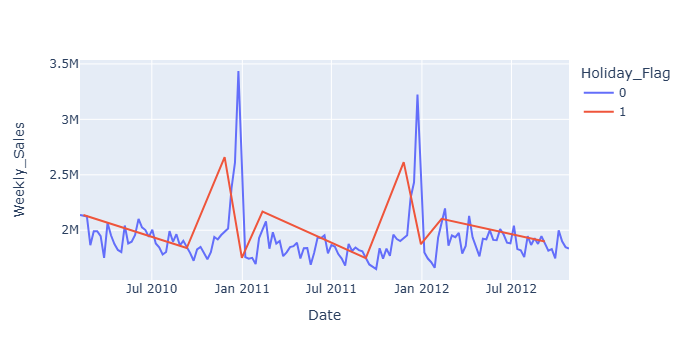

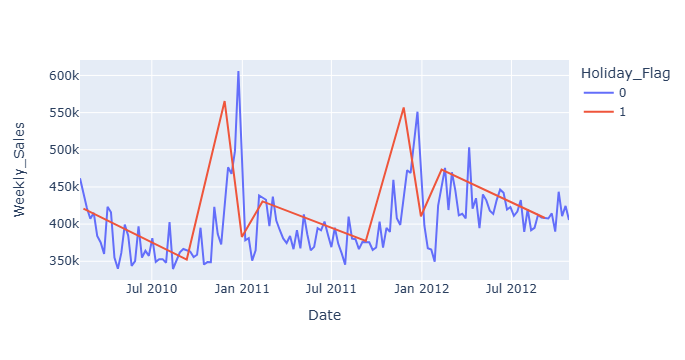

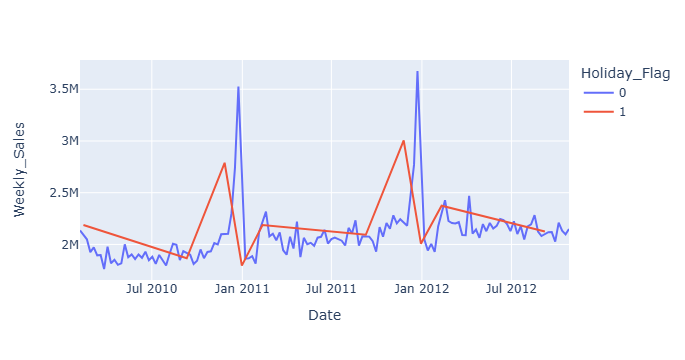

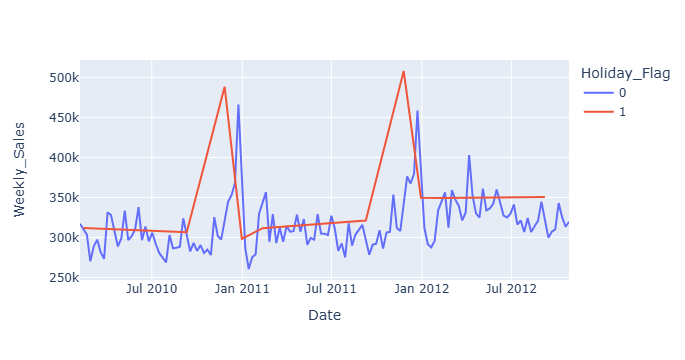

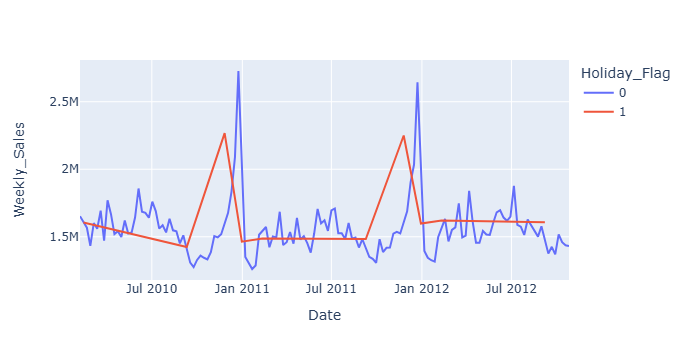

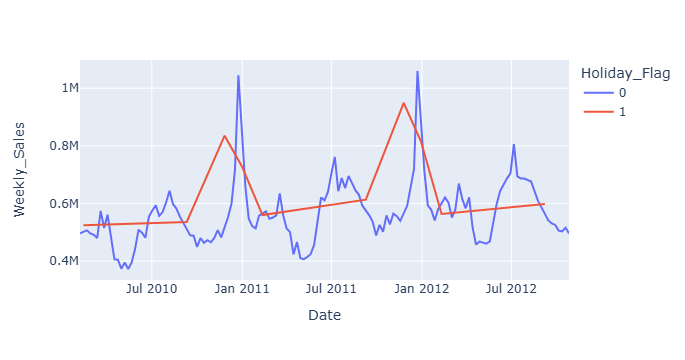

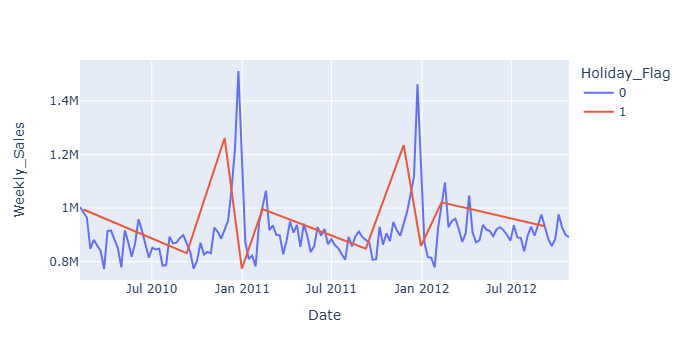

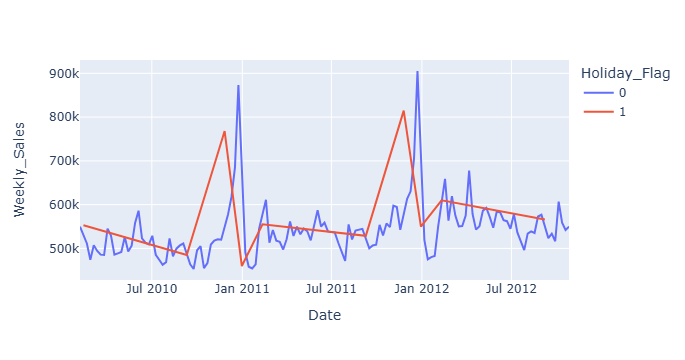

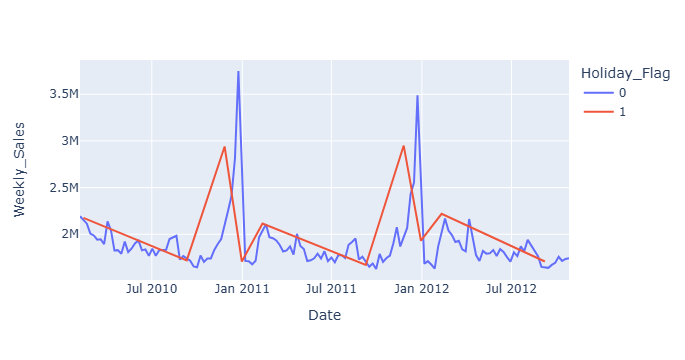

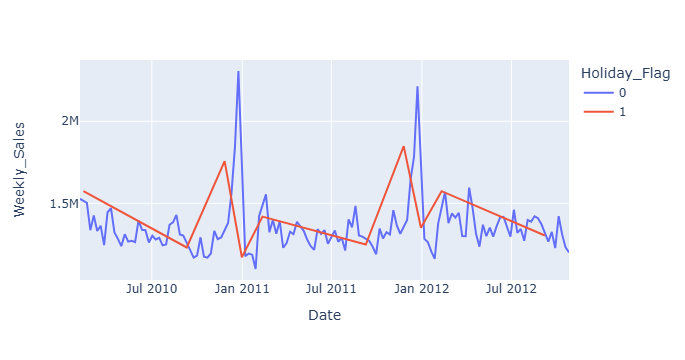

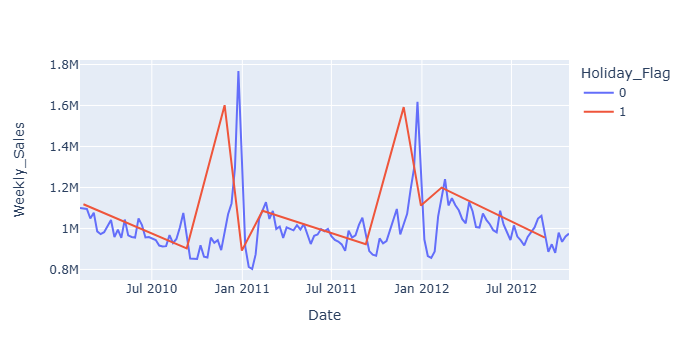

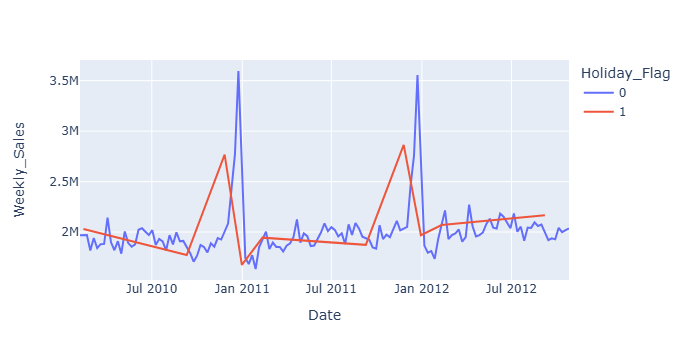

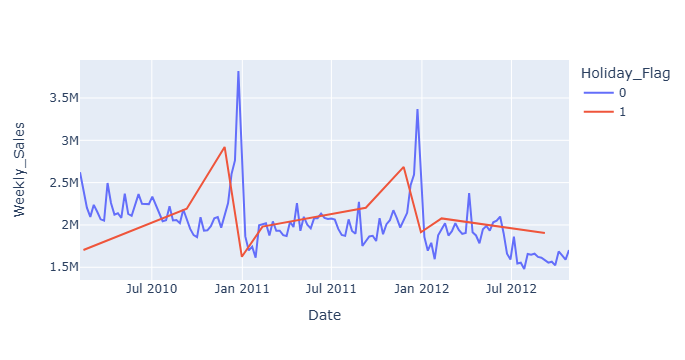

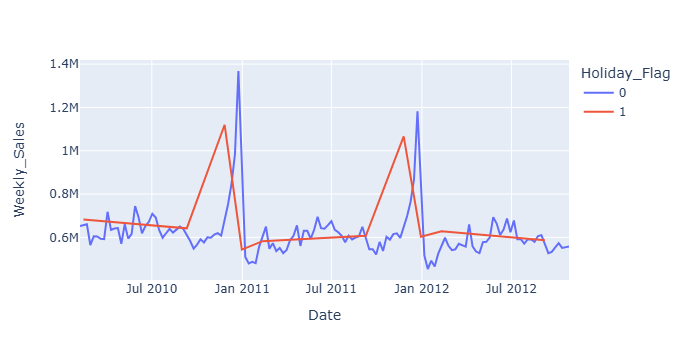

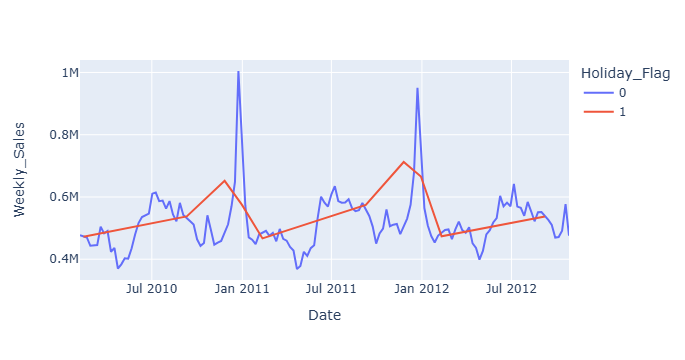

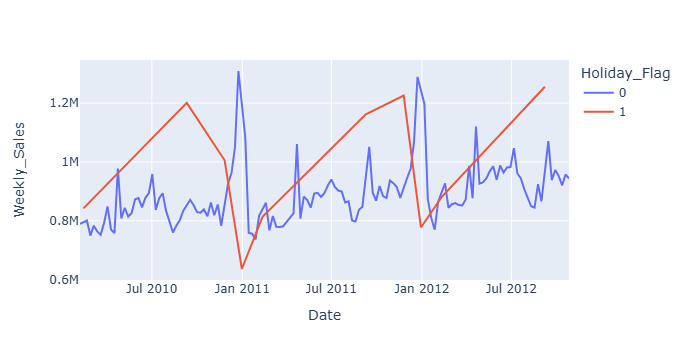

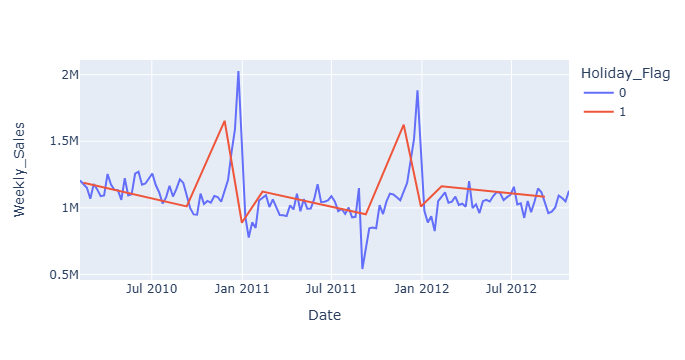

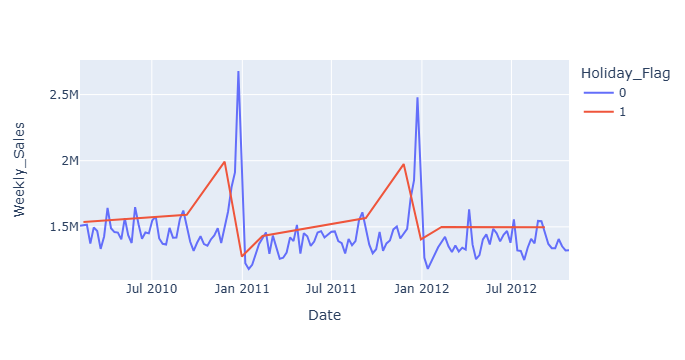

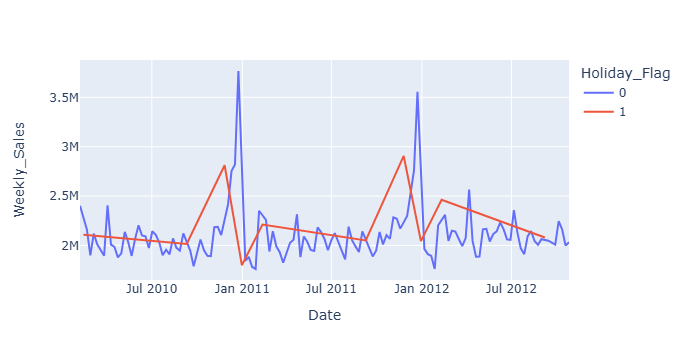

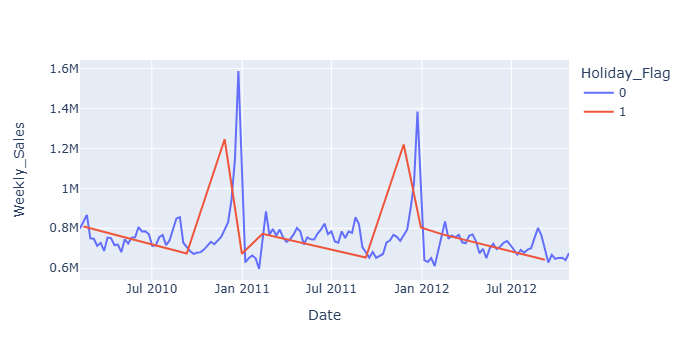

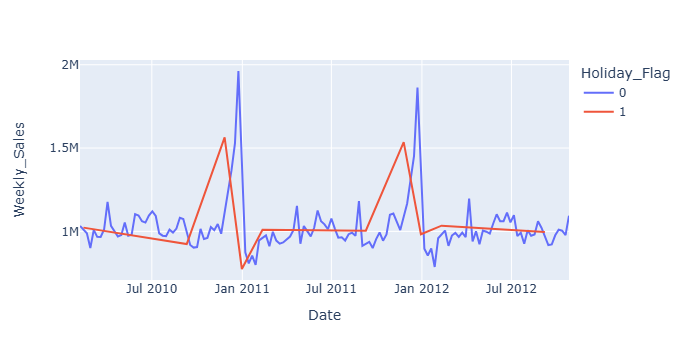

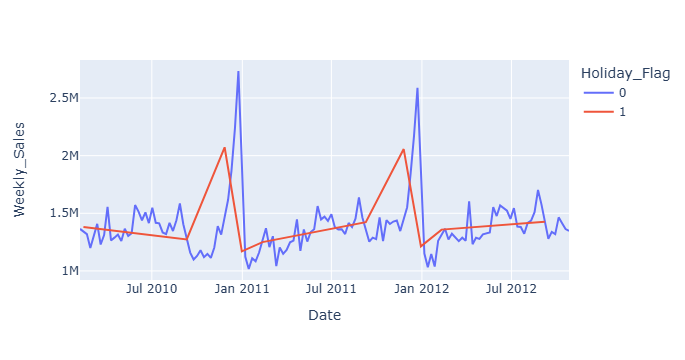

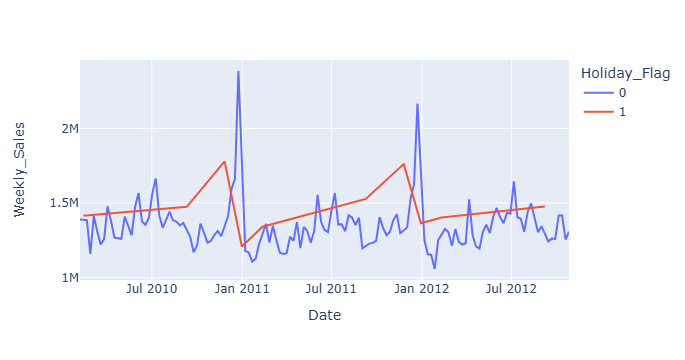

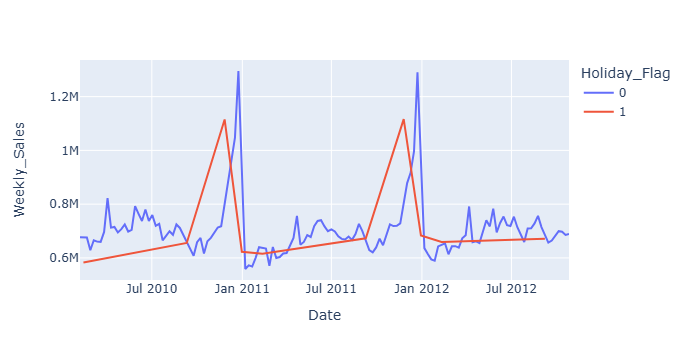

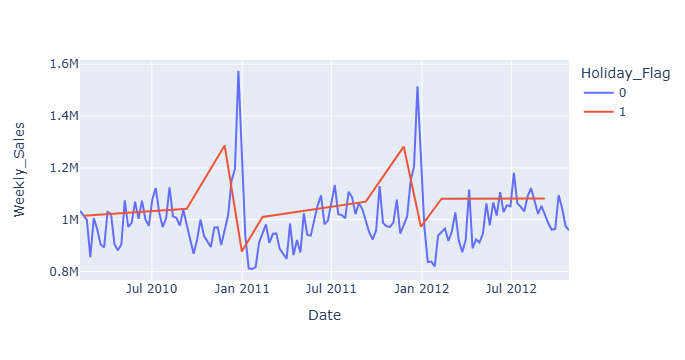

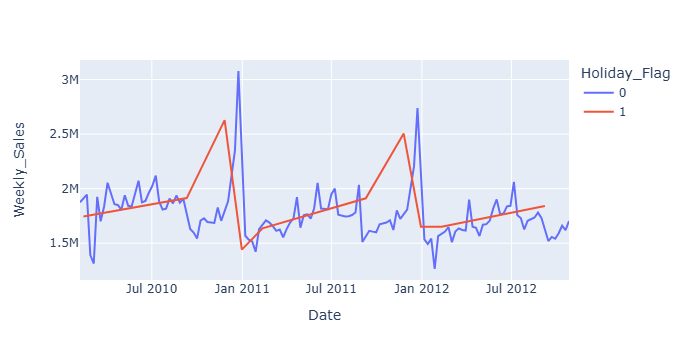

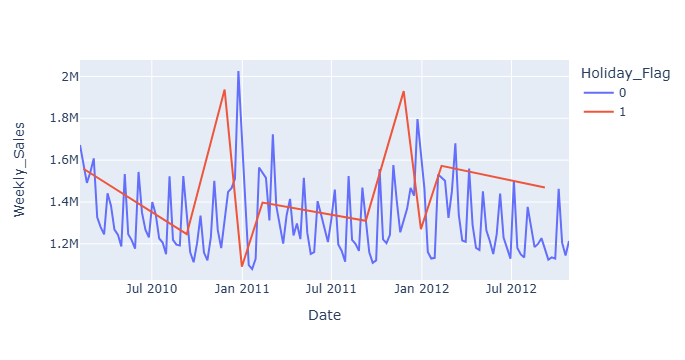

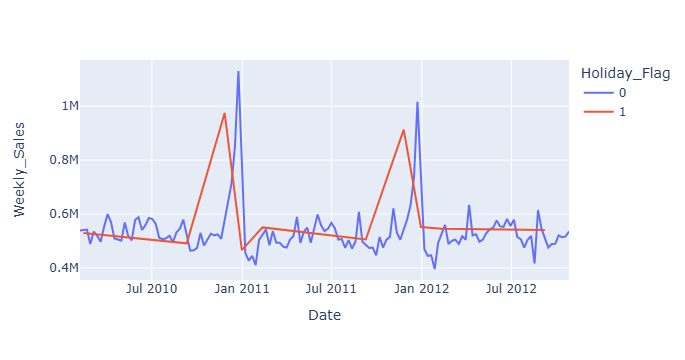

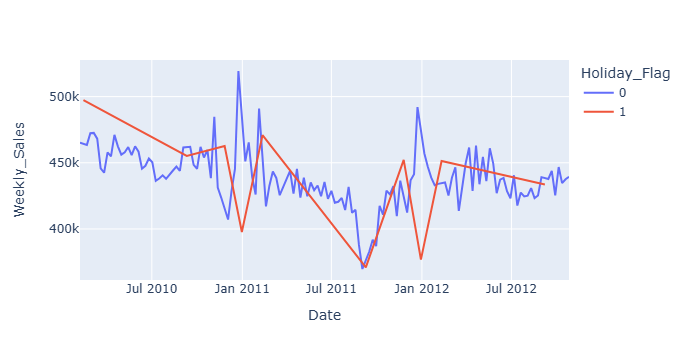

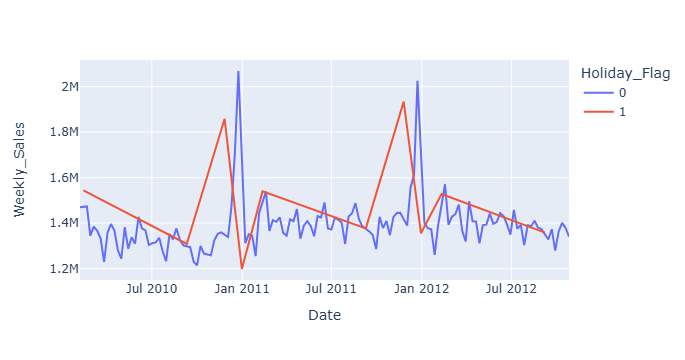

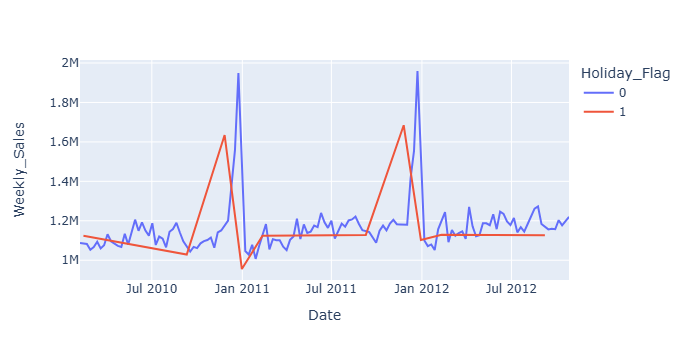

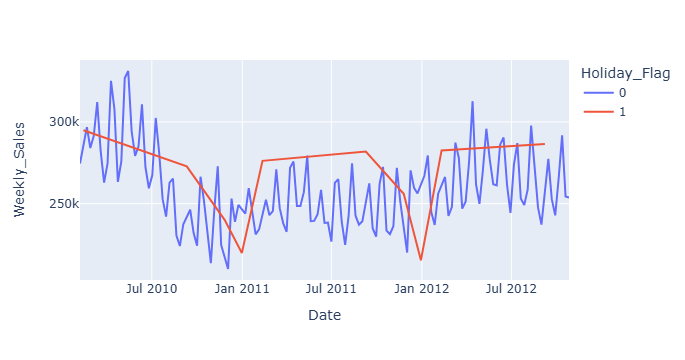

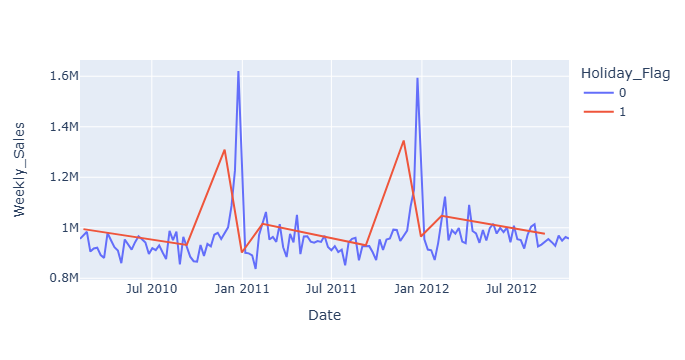

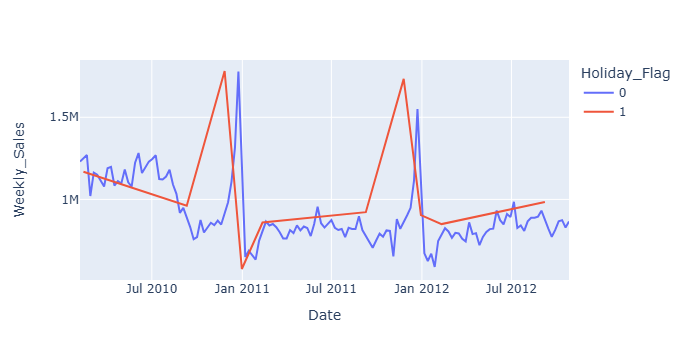

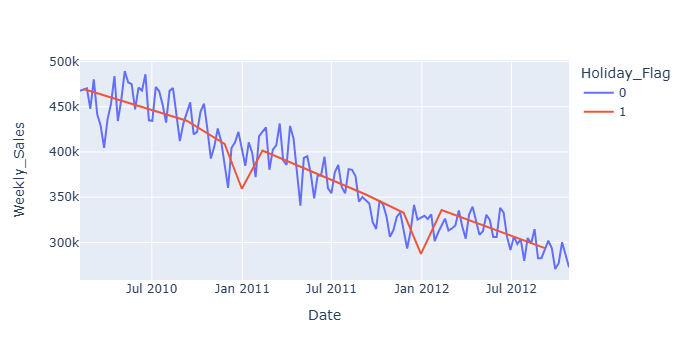

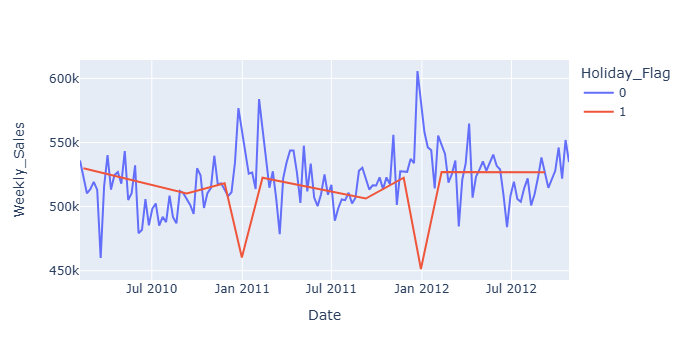

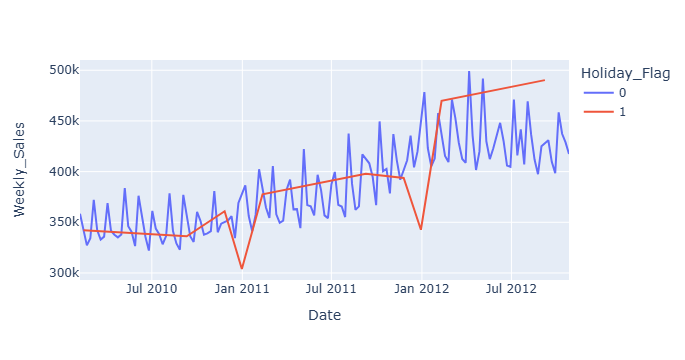

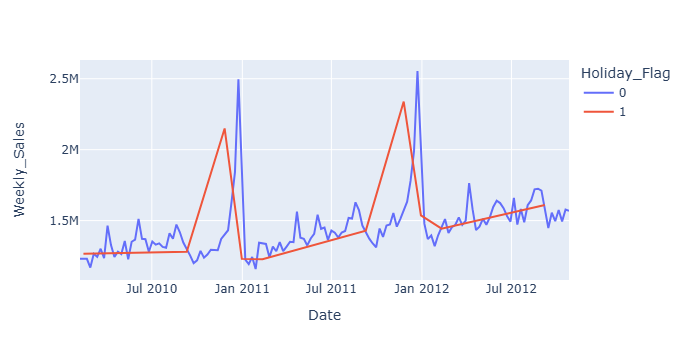

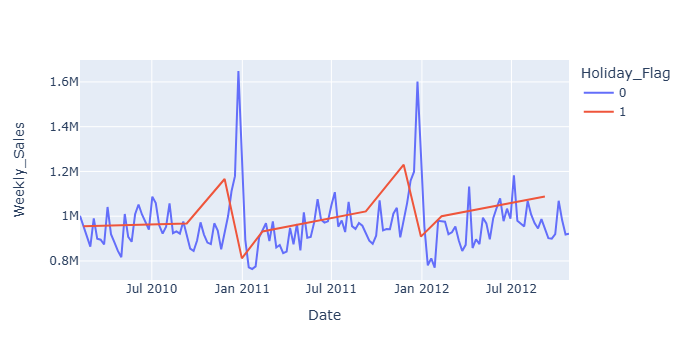

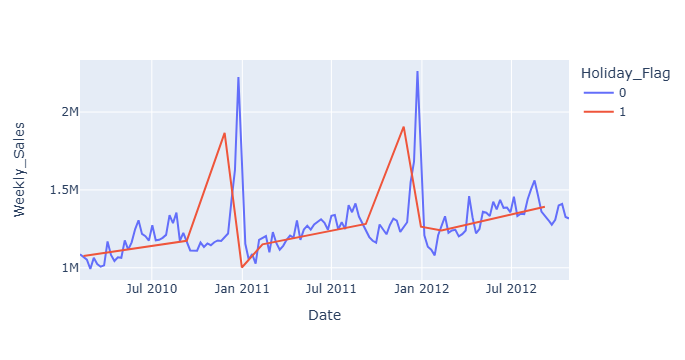

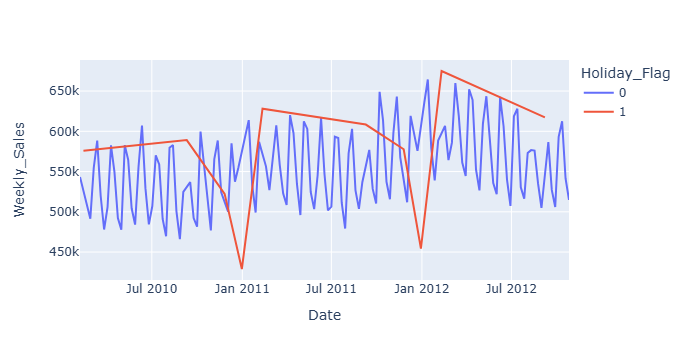

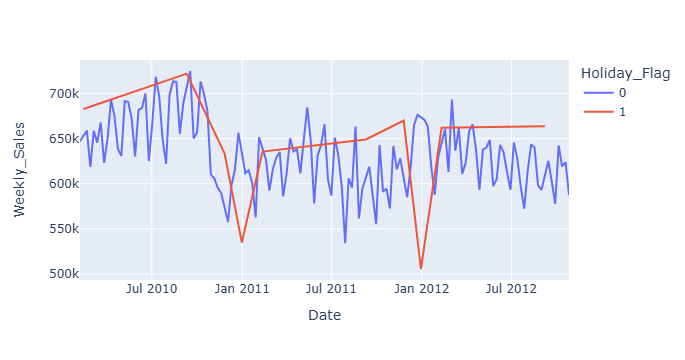

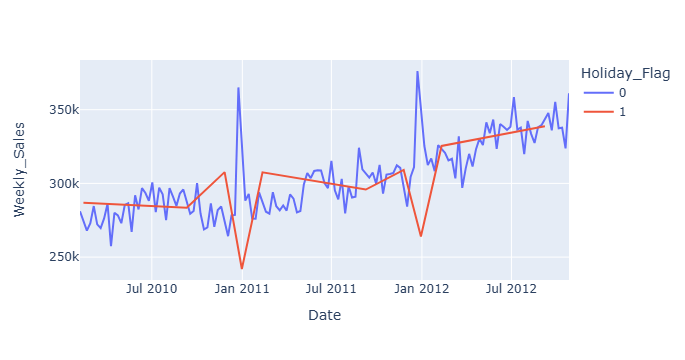

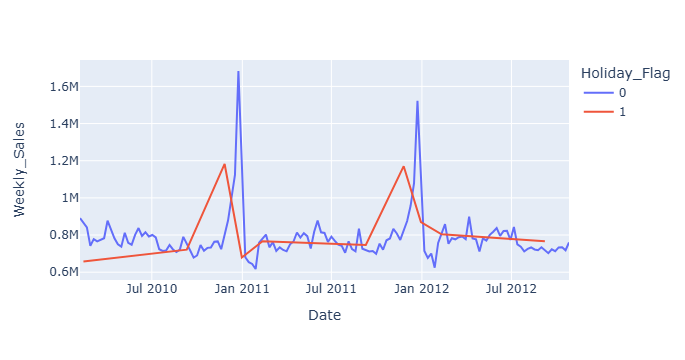

In [28]:
for i in range(45):
    figure=px.line(df[df['Store']==i+1],y='Weekly_Sales',color='Holiday_Flag')
    figure.show()

In [29]:
df1=df[df['Store']==1]

<p>H0 :- There is no significant relationship between Weekly Sales and CPI</p>
<p>H1 :- There is significant relationship between Weekly Sales and CPI</p>

In [31]:
from statsmodels.stats.weightstats import ztest
z_test,pvalue=ztest(df1['Weekly_Sales'],df['CPI'])
if pvalue<0.05:
    print('Reject Null Hypothesis i.e There is significant relationship between Weekly Sales and CPI')
else:
    print('Accept Null Hypothesis i.e. There is not significant relationship between Weekly Sales and CPI')

Reject Null Hypothesis i.e There is significant relationship between Weekly Sales and CPI


<p>H0 :- There is no significant relationship between Weekly Sales and Unemployment</p>
<p>H1 :- There is significant relationship between Weekly Sales and Unemployment</p>

In [32]:
z_test,pvalue=ztest(df1['Weekly_Sales'],df['Unemployment'])
if pvalue<0.05:
    print('Reject Null Hypothesis i.e. There is significant relationship between Weekly Sales and Unemployment')
else:
    print('Accept Null Hypothesis i.e. There is not significant relationship between Weekly Sales and Unemployment')

Reject Null Hypothesis i.e. There is significant relationship between Weekly Sales and Unemployment


<p>H0 :- There is no significant relationship between Weekly Sales and Fuel Price</p>
<p>H1 :- There is significant relationship between Weekly Sales and Fuel Price</p>

In [33]:
z_test,pvalue=ztest(df1['Weekly_Sales'],df['Fuel_Price'])
if pvalue<0.05:
    print('Reject Null Hypothesis i.e. There is significant relationship between Weekly Sales and Fuel Price')
else:
    print('Accept Null Hypothesis i.e. There is no significant relationship between Weekly Sales and Fuel Price')

Reject Null Hypothesis i.e. There is significant relationship between Weekly Sales and Fuel Price


In [34]:
df1['Day']=df1.index.day

/tmp/ipykernel_105/761320732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



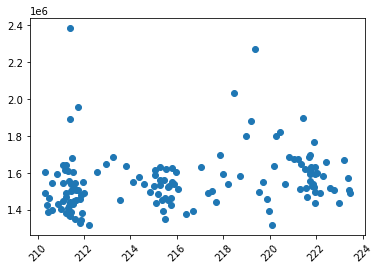

In [35]:
plt.tick_params(axis='x',rotation=45)
plt.scatter(df1['CPI'],df1['Weekly_Sales'])
plt.show()

In [40]:
def func(x,a,b,c,d,e):
    return a*(x**4)+b*abs((x**3))+c*(x**2)+d*abs((x))+e

In [41]:
p_opt,p_cov=curve_fit(func,df1['CPI'],df1['Weekly_Sales'])

In [42]:
y_predict=func(df1['CPI'].values,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4])

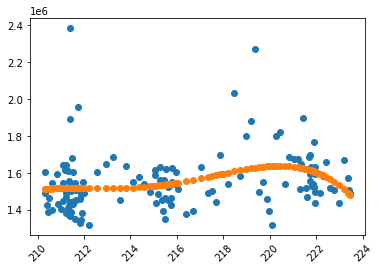

In [43]:
plt.tick_params(axis='x',rotation=45)
plt.scatter(df1['CPI'],df1['Weekly_Sales'])
plt.scatter(df1['CPI'],y_predict)
plt.show()